Customer Travel Churn

A Tour & Travels Company Wants To Predict Whether a Customer Will Churn Or Not, Based On the Indicators Given Below.
Help Build Predictive Models And Save The Company's Money.

In [284]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [285]:
# Data Importation 
d1=pd.read_csv(r"C:\Users\dell\Desktop\ML\Dataset\Customertravel.csv")
d1.head(10)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
5,27,Yes,High Income,1,No,Yes,1
6,34,No,Middle Income,4,Yes,Yes,0
7,34,No,Low Income,2,Yes,No,1
8,30,No,Low Income,3,No,Yes,0
9,36,Yes,High Income,1,No,No,1


In [286]:
d1.info()
d1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


(954, 7)

From the above Info: Target is the Churn (Yes (1) - Customer Churns / No (0) - Customer Doesn't Churn)

And there are 4 object data type, for better machine understanding, we are transforming Categorical values to numerical values (0's,1's,2's)

# Label Encoding

In [287]:
label=LabelEncoder()
d1['FrequentFlyer']=label.fit_transform(d1['FrequentFlyer'])
print(d1['FrequentFlyer'].unique())
# print(d1['FrequentFlyer'].value_counts())
print("0 - No 1 - No Record 2 - Yes")

[0 2 1]
0 - No 1 - No Record 2 - Yes


In [288]:
d1['AnnualIncomeClass']=label.fit_transform(d1['AnnualIncomeClass'])
print(d1['AnnualIncomeClass'].unique())
# print(d1['AnnualIncomeClass'].value_counts())
print("0 - Low Income 1 - Middle Income 2 - High Income")

[2 1 0]
0 - Low Income 1 - Middle Income 2 - High Income


In [289]:
d1['BookedHotelOrNot']=label.fit_transform(d1['BookedHotelOrNot'])
print(d1['BookedHotelOrNot'].unique())
# print(d1['BookedHotelOrNot'].value_counts())
print("0 - No 1 - Yes")

[1 0]
0 - No 1 - Yes


In [290]:
d1['AccountSyncedToSocialMedia']=label.fit_transform(d1['AccountSyncedToSocialMedia'])
print(d1['AccountSyncedToSocialMedia'].unique())
#print(d1['AccountSyncedToSocialMedia'].value_counts())
print("0 - No 1 - Yes")

[0 1]
0 - No 1 - Yes


In [291]:
d1.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [292]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         954 non-null    int64
 1   FrequentFlyer               954 non-null    int32
 2   AnnualIncomeClass           954 non-null    int32
 3   ServicesOpted               954 non-null    int64
 4   AccountSyncedToSocialMedia  954 non-null    int32
 5   BookedHotelOrNot            954 non-null    int32
 6   Target                      954 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 37.4 KB


# Feature Scaling

In [293]:
X=d1.iloc[:,0:6].values
X.shape

(954, 6)

In [294]:
y=d1.iloc[:,-1]
y.shape

(954,)

In [295]:
#plt.scatter(X,y,c=y_test,cmap='rainbow')
#plt.show()

# Model Selection

In [296]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
# xtrain - training input sample (763)
print('training input sample',X_train.shape)

# ytrain - training target label(763)
print('training output label',y_train.shape)

# xtest - testing input sample (191)
print('testing input sample',X_test.shape)

# ytest - testing target label(191)
print('testing output label',y_test.shape)

training input sample (763, 6)
training output label (763,)
testing input sample (191, 6)
testing output label (191,)


# Logistic Regression

In [297]:
# Logistice Regression
# Model Invocation
model = LogisticRegression()

In [298]:
# Fitting the model
model.fit(X_train,y_train)

LogisticRegression()

In [299]:
# Acurracy on training data
x_train_Pred=model.predict(X_train)
training_data_accuracy=accuracy_score(x_train_Pred,y_train)*100

In [300]:
# Acurracy on testing data
x_test_Pred=model.predict(X_test)
test_data_accuracy=accuracy_score(x_test_Pred,y_test)*100

In [301]:
#Confusion Matrix
ypre1 = model.predict(X_test)
print(confusion_matrix(y_test,ypre1))

[[144  12]
 [ 20  15]]


In [302]:
# Classification Report
Cls_Rep=classification_report(y_test,ypre1)
print('Classification Report is')
print(Cls_Rep)

Classification Report is
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       156
           1       0.56      0.43      0.48        35

    accuracy                           0.83       191
   macro avg       0.72      0.68      0.69       191
weighted avg       0.82      0.83      0.82       191



In [303]:
# Acurracy Score
print("Accuracy on training data: ",round(training_data_accuracy,2))
print("Accuracy on testing data: ",round(test_data_accuracy,2))

Accuracy on training data:  81.91
Accuracy on testing data:  83.25


In [304]:
#plt.scatter(X,y,c=y_test,cmap='rainbow')
#plt.show()

# Random Forest 

In [305]:
# Randam_Forest using Entropy
Random_Forest=RandomForestClassifier(n_estimators=10,criterion='entropy')
Random_Forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [306]:
# Entropy ypre calculation
ypre=Random_Forest.predict(X_test)
# Confusion Marix
con_mat=confusion_matrix(y_test,ypre)
print('Confusion matrix output is')
print(con_mat)

Confusion matrix output is
[[148   8]
 [ 12  23]]


In [307]:
# Classification Report
Cls_Rep=classification_report(y_test,ypre)
print('Classification Report is')
print(Cls_Rep)

Classification Report is
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       156
           1       0.74      0.66      0.70        35

    accuracy                           0.90       191
   macro avg       0.83      0.80      0.82       191
weighted avg       0.89      0.90      0.89       191



In [308]:
# Accuracy Score
Acc_score=accuracy_score(y_test,ypre)*100
print('Accuracy score is')
print(round(Acc_score,2))

Accuracy score is
89.53


# Naive Bayes

In [309]:
# Navie Bayes
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB()

In [310]:
# Acurracy on training data
X_train_pred_NB=model_NB.predict(X_train)
train_data_accur_NB=accuracy_score(X_train_pred_NB,y_train)*100

In [311]:
# Acurracy on testing data
X_test_pred_NB=model_NB.predict(X_test)
test_data_accur_NB=accuracy_score(X_test_pred_NB,y_test)*100

In [312]:
# Accuracy Score
print("Accuracy on training data: ",round(train_data_accur_NB,2))
print("Accuracy on testing data: ",round(test_data_accur_NB,2))

Accuracy on training data:  78.77
Accuracy on testing data:  80.63


# Pie Chart

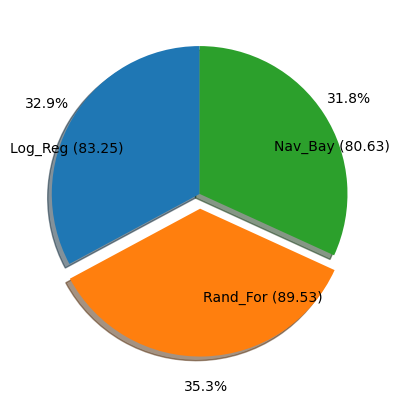

In [314]:
# Pie chart representation for Algorithm:

x1 = ["Log_Reg (83.25)","Rand_For (89.53)","Nav_Bay (80.63)"]
y1 = [test_data_accuracy,Acc_score,test_data_accur_NB]
explode = (0, 0.1, 0)
fig, ax = plt.subplots()
##ax.pie(y,explode=explode,labels=,autopct='%1.1f%%',shadow=True,startangle=180)
ax.pie(y1, explode=explode, labels=x1, autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.6, shadow=True, startangle=90)

plt.show()